# Imports 

In [1]:

%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from qick import *
from qick.helpers import gauss
from tqdm import tqdm_notebook as tqdm

import time
import os
import sys
sys.path.append('/home/xilinx/jupyter_notebooks/')
sys.path.append('C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts')
import scipy as sp
import json
from scipy.fft import fft, fftfreq

from slab.instruments import *
from slab.experiment import Experiment
from slab.datamanagement import SlabFile
from slab import get_next_filename, AttrDict
from slab import Experiment, dsfit, AttrDict

# Figure params
plt.rcParams['figure.figsize'] = [10,6]
plt.rcParams.update({'font.size': 14})

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [2]:
from slab.dsfit import *
import os
from scipy.interpolate import griddata
from numpy import mgrid, array, zeros,abs,pi,cos,transpose, linspace
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from tempfile import TemporaryFile
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 15}
import json
from h5py import File
from datetime import datetime
import time
from slab.datamanagement import SlabFile
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from slab.dsfit import *
from scipy.optimize import curve_fit
# import experiments.fitting as fitter
from matplotlib.colors import Normalize

## Import modules from parent and multimode expts

In [3]:
import json
import os

# Get the current working directory
path = os.getcwd()
print("Current Path:", path)

# Isolate the parent directory
parent_path = os.path.dirname(path)
print("Parent Path:", parent_path)

# Add the parent path to the sys.path
sys.path.append(parent_path)

Current Path: c:\_Lib\python\multimode_expts\analysis_notebooks
Parent Path: c:\_Lib\python\multimode_expts


In [4]:
import sys

# Path to add
expts_path = 'C:\\_Lib\\python\\multimode_expts'

# Add the path to the system path at the highest priority
if expts_path not in sys.path:
    sys.path.insert(0, expts_path)
    print('Path added at highest priority')

# Verify the path is added
print(sys.path)


Path added at highest priority
['C:\\_Lib\\python\\multimode_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'C:\\_Lib\\python', 'C:\\_Lib\\python\\slab', 'C:\\_Lib\\python\\qick\\qick_lib', 'C:\\_Lib\\python\\rfsoc\\rfsoc_multimode\\example_expts', 'c:\\_Lib\\python\\multimode_expts\\analysis_notebooks', 'c:\\Users\\26049\\.conda\\envs\\slab\\python38.zip', 'c:\\Users\\26049\\.conda\\envs\\slab\\DLLs', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab', '', 'C:\\Users\\26049\\AppData\\Roaming\\Python\\Python38\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\easy_lmfit-1.0-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\attrdict-2.0.1-py3.8.egg', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\site-packages\\win32\\lib', 'c:\\Users\\26049\\.conda\\envs\\slab\\lib\\s

In [5]:
from multimode_expts.fit_display import *

importing from path  C:\_Lib\python\multimode_expts\experiments\clifford_averager_program.py
imported experiments.clifford_averager_program
importing from path  C:\_Lib\python\multimode_expts\experiments\fitting.py
imported experiments.fitting
importing from path  C:\_Lib\python\multimode_expts\experiments\qram_protocol_timestepped.py
imported experiments.qram_protocol_timestepped
importing from path  C:\_Lib\python\multimode_expts\experiments\qubit_cavity
imported experiments.qubit_cavity.amplitude_rabi_f0g1
imported experiments.qubit_cavity.displacement_enhanced_sideband
imported experiments.qubit_cavity.displace_amplitude_calibration
imported experiments.qubit_cavity.displace_pulse_probe
imported experiments.qubit_cavity.ecd
imported experiments.qubit_cavity.ecd_backup
imported experiments.qubit_cavity.ecd_read_spec
imported experiments.qubit_cavity.non_demolution_readout
imported experiments.qubit_cavity.out_and_back
imported experiments.qubit_cavity.photo_resolved_pulse_probe
impo

In [6]:
import experiments.fitting as fitter
from numpy.linalg import inv

# Exp path

In [7]:

# print("path: ", path)

"""Reopen saved data"""
def prev_data(expt_path, filename):
    temp_data_file = expt_path+'\\'+filename
    with SlabFile(temp_data_file) as a:
        attrs = dict()
        for key in list(a.attrs):
            attrs.update({key:json.loads(a.attrs[key])})
        keys = list(a)
        temp_data = dict()
        for key in keys:
            temp_data.update({key:np.array(a[key])})
        # print(f'Extracted data and attrs {list(a.attrs)}')
    return temp_data, attrs

data_parent =  r'H:\Shared drives\SLab\Multimode\experiment\240911'
expt_path=data_parent+'\\data1'
expt_path_old = data_parent+'\\data'
print('Data are extracted from', expt_path)

Data are extracted from H:\Shared drives\SLab\Multimode\experiment\240911\data1


# Yaml Cfg

In [8]:
config_file = parent_path+'\\config_rfsoc_ziqian.yml'
config_path = config_file
print('Config will be', config_path)

exp_param_file = parent_path+'\\experiment_config.yml'
exp_param_path = exp_param_file
print('Exp Param will be', exp_param_path)
qubit_i = 0
import yaml
with open(config_file, 'r') as cfg_file:
    yaml_cfg = yaml.safe_load(cfg_file)
yaml_cfg = AttrDict(yaml_cfg)

Config will be c:\_Lib\python\multimode_expts\config_rfsoc_ziqian.yml
Exp Param will be c:\_Lib\python\multimode_expts\experiment_config.yml


In [12]:
import ast

# Loading rbam sim data

Interesting: Fit exp doesn't take into account error on data to be fitted. This is a problem.

In [10]:
# Variables from the active file
name = 'all_storage_rbam'
saving_dataset_path = r'h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets'
folder = saving_dataset_path  # Ensure this variable is defined in your script

# Ensure the folder exists
os.makedirs(folder, exist_ok=True)

# File path to save the DataFrame
file_path = os.path.join(folder, f"{name}.csv")

# Save the DataFrame to a CSV file
df = pd.read_csv(file_path)

print(f"DataFrame read from {file_path}")

DataFrame read from h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\all_storage_rbam.csv


In [11]:
df

,file_list,mode_list,fidelity,name
0,[855 856 857 858 859 860 861 862 863 864 865 8...,"[1, 2, 3, 4, 5, 6, 7]","[0.9236295707378324, 0.9183777694768962, 0.927...",_MultiRBAM_sweep_depth.h5


In [14]:
df['file_list'][0]

'[855 856 857 858 859 860 861 862 863 864 865 866 867 868 869 870 871 872\n 873 874 875 876 877 878]'

In [16]:
file_list = np.arange(855, 879, 1) # manually input the file list since can't do ast.literal_eval(df['file_list'][0]) {NOT SEPARATED BY COMMA}

f0g1_time:  1.7913635833975343
sim_rb_time:  32.999065888938794
[[0.8240515250187467, 0.7359249775642367, 0.6569671539929295, 0.5855780184739927, 0.5625971584826203, 0.510456611353595, 0.48006241737276395, 0.4545557201259701, 0.44846022268822544, 0.43184405756296507, 0.42146762383216757, 0.416828850333224, 0.4085724155023586, 0.40726319143254147, 0.40283351917757915, 0.4122765951579852, 0.4043616654300022, 0.40249816731927546, 0.41790344096138593, 0.4077577442702303, 0.4016794466447861, 0.3884151220711369, 0.4027535692846126, 0.40349790400999275], [0.818537220901563, 0.7179028544417605, 0.6397467615735836, 0.5765315572655081, 0.5302302756244789, 0.49915179601789794, 0.46760786886850425, 0.43715960208438814, 0.4311914948286855, 0.4186344098928788, 0.4170686606786529, 0.4048074546100299, 0.40223999176527375, 0.4004472319259226, 0.3897571438099841, 0.395398197129332, 0.3979775474391622, 0.3962855158435001, 0.4159847464210347, 0.40399364431582274, 0.3930317157535868, 0.3820806190544863, 0.

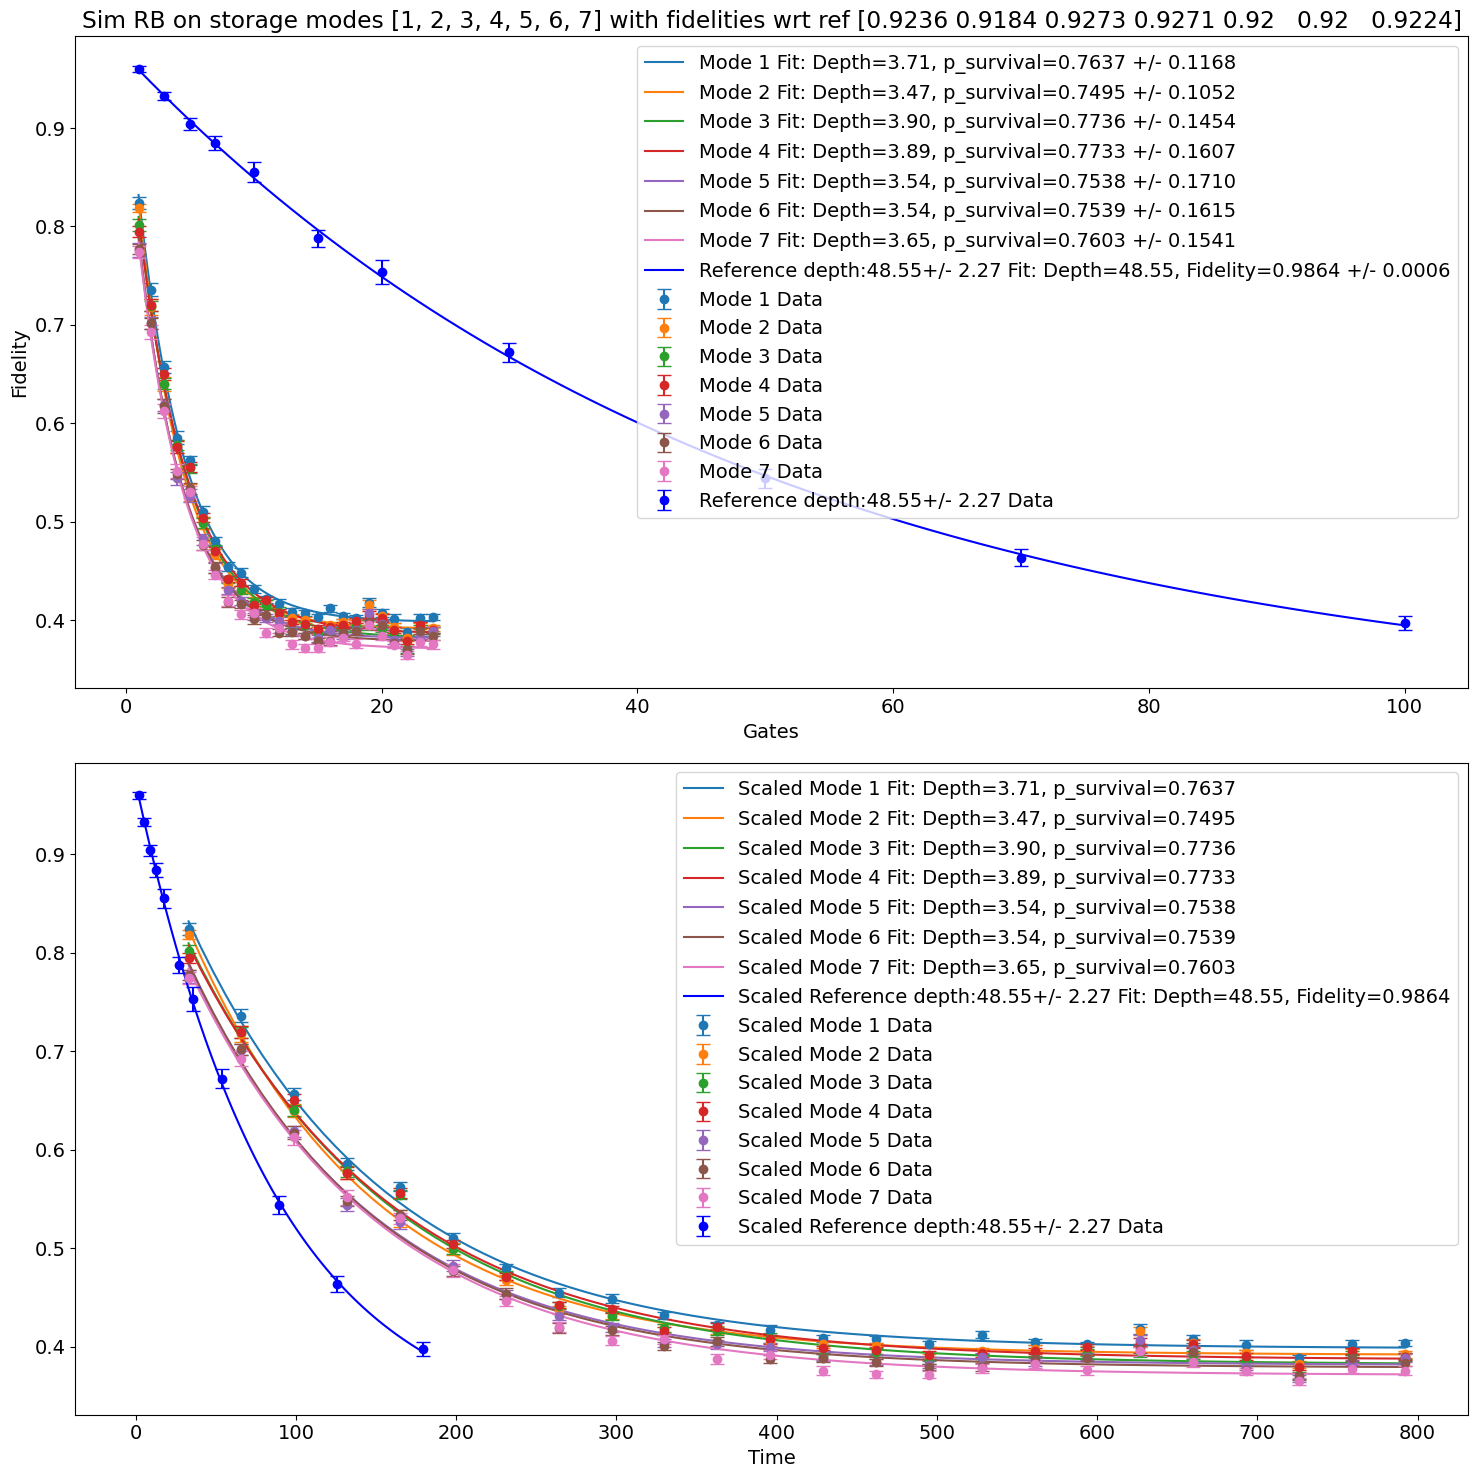

In [29]:
combinations = [[1,2,3,4,5,6,7]]
data = []

# open files and extract data
name = df['name'][0]
max_idx = 100 #15
last_file_list =file_list #ast.literal_eval(df['file_list'][0])

comb = combinations[0]
mode_list = comb
mode_length = len(mode_list)
file_list = last_file_list

# compute fidelity for each depth for each mode trace
xlist, fids_list, ebars_list = compute_fidelity_list(prev_data, file_list, name, mode_length, expt_path_old)

# compute the fidelity of gate from each mode exponential trace
fidelity_list, fidelity_err_list, fit_params_list, fit_pCov_list = fit_fidelity(xlist, fids_list) # fidelity of each mode RB

# Reference data
file_list_reference = np.arange(51, 62, 1)
name_reference = '_SingleRB_sweep_depth.h5'
xlist_ref, fids_list_ref, ebars_list_ref = compute_fidelity_list_RB(prev_data, file_list_reference, name_reference, 1, expt_path_old)
fit_params_ref, err_ref = fit_fidelity_reference(xlist_ref, fids_list_ref)
captionStr_ref = 'Reference depth:' + str(np.round(fit_params_ref[3], 2)) + '+/- ' + str(np.round(np.sqrt(err_ref[3][3]), 2))

# scale factors for plotting 
f0g1_time = get_f0g1_time(yaml_cfg)
print('f0g1_time: ', f0g1_time)

sim_rb_time = get_gate_time_RBAM(mode_list[0], mode_list[1:], yaml_cfg)
print('sim_rb_time: ', sim_rb_time)

# Plot both traces on the same plot
print(fids_list)
fids_wrt_ref, fids_wrt_err = plot_fidelity(xlist, fids_list, ebars_list,
                              fidelity_list, fidelity_err_list, fit_params_list, fit_pCov_list,
                                xlist_ref, fids_list_ref, ebars_list_ref,
                                  fit_params_ref,  err_ref,captionStr_ref,
                                mode_list, close_plt=False, scale_factor=sim_rb_time, scale_factor_ref=f0g1_time,)



In [31]:
fidelity_list

[0.7637420387794925,
 0.7495271016310445,
 0.7736040388650036,
 0.7732671463409341,
 0.7538472765400438,
 0.7538770571412844,
 0.760306117981231]

In [32]:
fidelity_err_list

[0.00648104727927661,
 0.006553861105802447,
 0.007411836586128831,
 0.008214768253722924,
 0.01029142884904556,
 0.009721253161223896,
 0.008799229926653405]

In [33]:
print('Fidelity with respect to reference:', fids_wrt_ref)
print('Fidelity with respect to reference error:', fids_wrt_err)

Fidelity with respect to reference: [0.9236295707378324, 0.9183777694768962, 0.9272556743083391, 0.9271320381424366, 0.9199770575052987, 0.9199880723547262, 0.9223628878087422]
Fidelity with respect to reference error: [0.0023637257128391355, 0.0024033975747269087, 0.0026860167071765186, 0.0029729590722028026, 0.003744568197393932, 0.0035388517246286054, 0.0031982564521195705]


Text(0.5, 0, 'Mode')

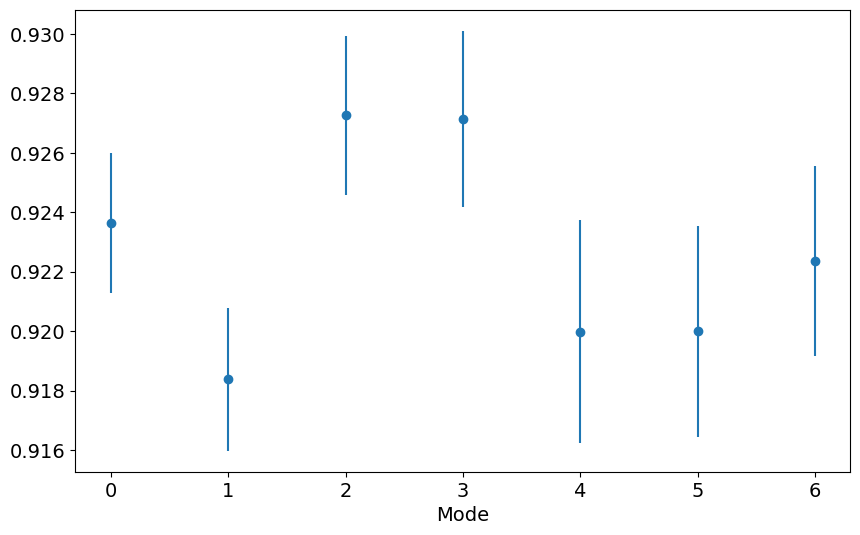

In [34]:
# plot the fidelity with respect to reference
plt.figure()
plt.errorbar(np.arange(len(fids_wrt_ref)), fids_wrt_ref, yerr=fids_wrt_err, fmt='o')
plt.xlabel('Mode')

In [35]:
data.append({
    'file_list': file_list,
    'mode_list': mode_list,
    'fidelity': fids_wrt_ref,
    'fidelity_err': fids_wrt_err,
    #'mode': f'Mode {i+1}'
})

# Save the data to a CSV file
df = pd.DataFrame(data)
df.to_csv(file_path, index=False)
print(f"DataFrame saved to {file_path}")

DataFrame saved to h:\Shared drives\SLab\Multimode\experiment\240911\RAM_paper_results\datasets\all_storage_rbam.csv


test_pulse = [3568.1751638611518, 3425.5537944060666, 2007.09],
 [10819, 8327, 15000],
 [0, 0, 0.6152866896346518],
 [0, 0, 0],
 [2, 2, 0],
 ['g', 'g', 'flat_top'],
 [0.035, 0.035, 0.005]